# MyND Offline Processing: Data Analysis
Author: Geeling Chau<br> 
<br>
Description: PSD Trends<br>
Sources: 
- Ollie's Segment Speller Offline Processing Code https://github.com/ollie-d/SegSpeller/blob/master/Offline%20Processing.ipynb 
- neurodsp https://github.com/neurodsp-tools/neurodsp
- FOOOF https://fooof-tools.github.io/fooof/index.html 
- PyEEG http://pyeeg.sourceforge.net/ 


## Imports

In [11]:
from helperFunctions import *
from constants import *
from dataAnalysisFunctions import *

from neurodsp.plts.spectral import *

import warnings
warnings.filterwarnings('ignore')

## Data imports

In [12]:
filename_foldername_dict_path = "../data/most_currently_updated.pickle"
filename_foldername_dict = loadPickle(filename_foldername_dict_path)

foldername=filename_foldername_dict["foldername"]
filename=filename_foldername_dict["filename"]
print(foldername, filename)

dataframe_directory = "../data/dataframe/"+foldername+"/"
dataframe_path = dataframe_directory+filename+".pickle"

df = loadPickle(dataframe_path)

P005 participant_P005_exp001_block_long


In [13]:
filtered_cleaned_data_directory = "../data/filtered_cleaned_data/"+foldername+"/"
filtered_cleaned_data_path = filtered_cleaned_data_directory+filename+".pickle"

filtered_cleaned_data = loadPickle(filtered_cleaned_data_path)

In [14]:
# Create a binning interval
binning=list(np.arange(.5, 30, 2))
intervals = getIntervals(binning)

In [15]:
data_type = "data_extended"
unfocused_df = df[((df["is_pressed"] == False) & (df["is_target"] == True))]
unfocused_data = unfocused_df[data_type].values
unfocused_windows = getWindowsList(unfocused_df)
unfocused_freqs, unfocused_psds, unfocused_psd_avg = getFreqsAndPSD(unfocused_windows) 
unfocused_power_ratio = [getPowerRatio(data[:499], binning) for data in unfocused_windows]

unfocused_sem = getSEM(unfocused_power_ratio)
unfocused_power_ratio_avg = np.mean(unfocused_power_ratio, axis=0)



focused_df = df[((df["is_pressed"] == True) & (df["is_target"] == True))]
focused_data = focused_df[data_type].values
focused_windows = getWindowsList(focused_df)
focused_freqs, focused_psds, focused_psd_avg = getFreqsAndPSD(focused_windows) 
focused_power_ratio = [getPowerRatio(data[:499], binning) for data in focused_windows]

focused_sem = getSEM(focused_power_ratio)
focused_power_ratio_avg = np.mean(focused_power_ratio, axis=0)


super_focused_df = df[((df["is_pressed"] == True) & (df["is_target"] == True) & (df["has_meme"] == True))]
super_focused_data = super_focused_df[data_type].values
super_focused_windows = getWindowsList(super_focused_df)
super_focused_freqs, super_focused_psds, super_focused_psd_avg = getFreqsAndPSD(super_focused_windows) 
super_focused_power_ratio = [getPowerRatio(data[:499], binning) for data in super_focused_windows]

super_focused_sem = getSEM(super_focused_power_ratio)
super_focused_power_ratio_avg = np.mean(super_focused_power_ratio, axis=0)


super_unfocused_df = df[((df["is_pressed"] == False) & (df["is_target"] == True) & (df["has_meme"] == True))]
super_unfocused_data = super_unfocused_df[data_type].values
super_unfocused_windows = getWindowsList(super_unfocused_df)
super_unfocused_freqs, super_unfocused_psds, super_unfocused_psd_avg = getFreqsAndPSD(super_unfocused_windows) 
super_unfocused_power_ratio = [getPowerRatio(data[:499], binning) for data in super_unfocused_windows]

super_unfocused_sem = getSEM(super_unfocused_power_ratio)
super_unfocused_power_ratio_avg = np.mean(super_unfocused_power_ratio, axis=0)


mispress_df = df[((df["is_pressed"] == True) & (df["is_target"] == False))]
mispress_data = mispress_df[data_type].values
mispress_windows = getWindowsList(mispress_df)
mispress_freqs, mispress_psds, mispress_psd_avg = getFreqsAndPSD(mispress_windows) 
mispress_power_ratio = [getPowerRatio(data[:499], binning) for data in mispress_windows]

mispress_sem = getSEM(mispress_power_ratio)
mispress_power_ratio_avg = np.mean(mispress_power_ratio, axis=0)


In [16]:
# Specify the size of the window size to plot 
plot_window_size = 150

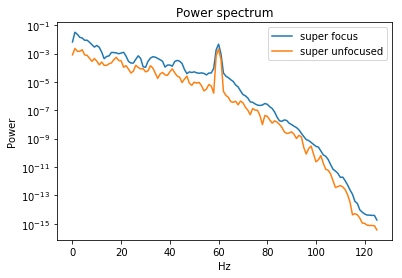

In [17]:
plt.semilogy(super_focused_freqs[:plot_window_size], super_focused_psd_avg[:plot_window_size], label="super focus")
plt.semilogy(super_unfocused_freqs[:plot_window_size], super_unfocused_psd_avg[:plot_window_size], label="super unfocused")
plt.legend()
plt.title("Power spectrum")
plt.xlabel("Hz")
plt.ylabel("Power")
plt.show()

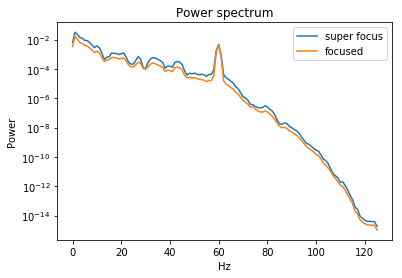

In [18]:
plt.semilogy(super_focused_freqs[:plot_window_size], super_focused_psd_avg[:plot_window_size], label="super focus")
plt.semilogy(focused_freqs[:plot_window_size], focused_psd_avg[:plot_window_size], label="focused")
plt.legend()
plt.title("Power spectrum")
plt.xlabel("Hz")
plt.ylabel("Power")
plt.show()

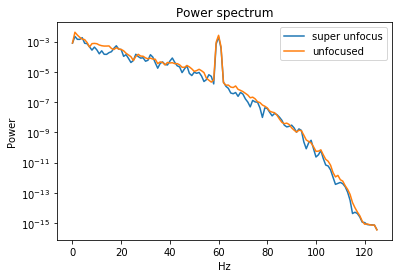

In [19]:
plt.semilogy(super_unfocused_freqs[:plot_window_size], super_unfocused_psd_avg[:plot_window_size], label="super unfocus")
plt.semilogy(unfocused_freqs[:plot_window_size], unfocused_psd_avg[:plot_window_size], label="unfocused")
plt.legend()
plt.title("Power spectrum")
plt.xlabel("Hz")
plt.ylabel("Power")
plt.show()

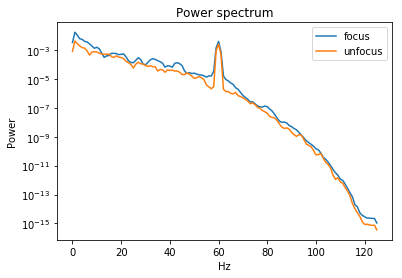

In [20]:
plt.semilogy(focused_freqs[:plot_window_size], focused_psd_avg[:plot_window_size], label="focus")
plt.semilogy(unfocused_freqs[:plot_window_size], unfocused_psd_avg[:plot_window_size], label="unfocus")
plt.legend()
plt.title("Power spectrum")
plt.xlabel("Hz")
plt.ylabel("Power")
plt.show()

### Spectral Analysis (no windowing)

In [23]:
unfocused_freqs, unfocused_psds, unfocused_psd_avg = getFreqsAndPSD(tidyEEGList(getEEGFromDataFrame_AvgLeftRight(unfocused_df))) 
focused_freqs, focused_psds, focused_psd_avg = getFreqsAndPSD(tidyEEGList(getEEGFromDataFrame_AvgLeftRight(focused_df)))
mispress_freqs, mispress_psds, mispress_psd_avg = getFreqsAndPSD(tidyEEGList(getEEGFromDataFrame_AvgLeftRight(mispress_df)))
# neutral_freqs, neutral_psds, neutral_psd_avg = getFreqsAndPSD(neutral_eeg_data) 


num unfocused 10 num focused 48


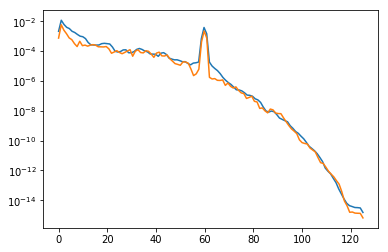

In [25]:
plot_window_size = 150
plt.semilogy(focused_freqs[:plot_window_size], focused_psd_avg[:plot_window_size], label="focus")
plt.semilogy(unfocused_freqs[:plot_window_size], unfocused_psd_avg[:plot_window_size], label="unfocus")

print("num unfocused", len(unfocused_psds), "num focused", len(focused_psds))

num unfocused 10 num focused 48


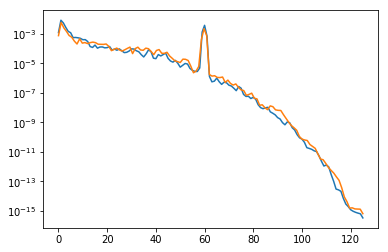

In [26]:
plot_window_size = 150
plt.semilogy(mispress_freqs[:plot_window_size], mispress_psd_avg[:plot_window_size], label="mispress")
plt.semilogy(unfocused_freqs[:plot_window_size], unfocused_psd_avg[:plot_window_size], label="unfocus")

print("num unfocused", len(unfocused_psds), "num focused", len(focused_psds))